In [2]:
# Regressive Model Template
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
import os
from importlib.machinery import SourceFileLoader
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
helpers = SourceFileLoader("helpers", "../helpers.py").load_module()
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


# read in all data from the auto table
fileData = os.path.join('../data', 'auto-mpg.csv')
df = pd.read_csv(fileData,na_values=['NA','?'])

cars = df['name']
df.drop('name',1,inplace=True)
helpers.missing_median(df, 'horsepower')

helpers.encode_text_dummy(df, 'origin')

x,y = helpers.to_xy(df,"mpg")


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=45)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))

model.add(Dense(1))  # 1 output neuron 





model.compile(loss='mean_squared_error', optimizer='adam')

# stops when data is flattening out
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train, validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)


pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

df_y = pd.DataFrame(y_test, columns=['ground_truth'])
df_pred = pd.DataFrame(pred, columns=['predicted'])
result = pd.concat([df_y, df_pred],axis=1)

helper.chart_regression(pred, y_test)


Epoch 00077: early stopping
Final score (RMSE): 5.048490524291992


NameError: name 'helper' is not defined

Epoch 00063: early stopping
Final score (RMSE): 2.1980268955230713


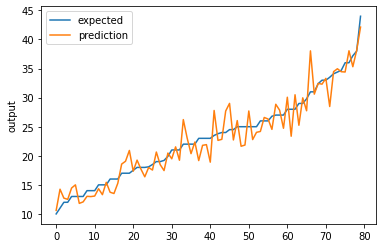

In [3]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
helpers = SourceFileLoader("helpers", "../helpers.py").load_module()

path = "../data"
preprocess = True

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# create feature vector
helpers.missing_median(df, 'horsepower')
helpers.encode_text_dummy(df, 'origin')
df.drop('name',1,inplace=True)

if preprocess:
    helpers.encode_numeric_zscore(df, 'horsepower')
    helpers.encode_numeric_zscore(df, 'weight')
    helpers.encode_numeric_zscore(df, 'cylinders')
    helpers.encode_numeric_zscore(df, 'displacement')
    helpers.encode_numeric_zscore(df, 'acceleration')
    helpers.encode_numeric_zscore(df, 'year')

# Encode to a 2D matrix for training
x,y = helpers.to_xy(df,'mpg')



# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Once the fitting of data comes to a regular point, we stop the training early. 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

# A callback function that will be fired when we do our fit. It will save our best results
checkpointer = ModelCheckpoint(filepath="./best.hdf5", verbose=0, save_best_only=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor, checkpointer],verbose=0,epochs=1000)

# Before we predict we want to load our best model
model.load_weights('./best.hdf5')

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

df_y = pd.DataFrame(y_test, columns=['ground_truth'])
df_pred = pd.DataFrame(pred, columns=['predicted'])
result = pd.concat([df_y, df_pred],axis=1)

helpers.chart_regression(pred.flatten(),y_test, sort=True)


